In [53]:
# Data processing
import numpy as np
import pandas as pd

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette("tab10")

# Statistical modelling
import pymc3 as pm
import theano 
import theano.tensor as tt
import patsy
import scipy.stats as st

print(f'{pm.__name__}: v. {pm.__version__}')
print(f'{theano.__name__}: v. {theano.__version__}')

pymc3: v. 3.5
theano: v. 1.0.2


In [54]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [55]:
SEED = 20180730

np.random.seed(SEED)

In [56]:
df = pd.read_csv('..\\datasets\\average_temp_got.csv', sep=';')
df.drop(columns=['Från Datum Tid (UTC)', 'Till Datum Tid (UTC)', 'Unnamed: 5', 'Kvalitet'], inplace=True)
df.rename({'Representativt dygn':'Date', 'Lufttemperatur':'Temperature_Celsius'},  axis=1, inplace=True)

df.head()

,Date,Temperature_Celsius
0,1988-01-01,6.7
1,1988-01-02,6.9
2,1988-01-03,6.2
3,1988-01-04,5.0
4,1988-01-05,4.2


In [57]:
df.set_index('Date', inplace=True)
df.set_index(pd.to_datetime(df.index, format="%Y/%m/%d"), inplace=True)
df.head()

,Temperature_Celsius
Date,
1988-01-01,6.7
1988-01-02,6.9
1988-01-03,6.2
1988-01-04,5.0
1988-01-05,4.2


In [113]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March'],
      dtype='object', name='Date', length=10588)

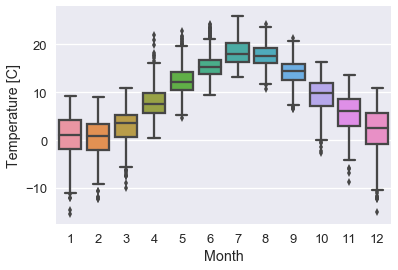

In [116]:
mask = (df.index.year >= 2000) & (df.index.year <= 2015)

ax = sns.boxplot(data=df[mask], 
            x=df[mask].index.month, 
            y='Temperature_Celsius', )

ax.set_xlabel('Month')
ax.set_ylabel('Temperature [C]')

pass

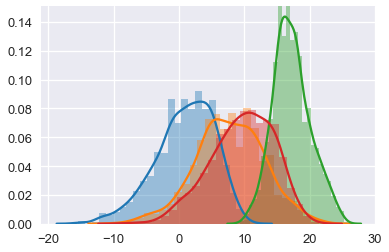

In [129]:
sns.distplot(df[(df.index.month_name().isin(['December', 'January', 'February'])) & mask])
sns.distplot(df[(df.index.month_name().isin(['March', 'April', 'May'])) & mask])
sns.distplot(df[(df.index.month_name().isin(['June', 'July', 'August'])) & mask])
sns.distplot(df[(df.index.month_name().isin(['September', 'October', 'November'])) & mask])

pass

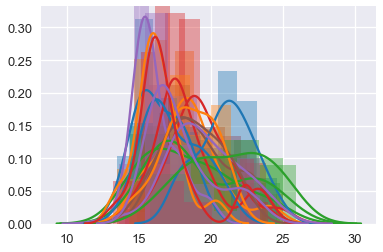

In [132]:
for year in np.arange(2000, 2017):
    sns.distplot(df[(df.index.year==year) & (df.index.month_name()=='July')])

pass

In [139]:
mask = (df.index.year in np.arange(2000, 2017)) & (df.index.month_name()=='July')

ax = sns.boxplot(data=df[mask], 
            x=df[mask].index.year, 
            y='Temperature_Celsius', )

ax.set_xlabel('Year')
ax.set_ylabel('Temperature [C]')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

pass

ValueError: Lengths must match to compare

In [146]:
df.index.year.tolist()

[1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,
 1988,

In [144]:
200 list(np.arange(2000, 2017))

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]